# Modeling - Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,RocCurveDisplay

## Import Datasets

In [6]:
X_train = pd.read_pickle("data/model_input/X_train.pkl")[:80000]
y_train = pd.read_pickle("data/model_input/y_train.pkl")[:80000]
X_test = pd.read_pickle("data/model_input/X_test.pkl")[:20000]
y_test = pd.read_pickle("data/model_input/y_test.pkl")[:20000]

## Scaling

In [9]:
scaler = StandardScaler()
X_train.iloc[:,1:71] = scaler.fit_transform(X_train.iloc[:,0:70])
X_test.iloc[:,1:71] = scaler.fit_transform(X_test.iloc[:,0:70])

## Hyperparameter Tuning

In [10]:
grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "class_weight": [None, "balanced"],
    "random_state": [0],
    "solver": ["liblinear", "saga"]
}

In [11]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg, grid)
clf.fit(X_train, y_train)

C:\Users\Caio\Documentos\xAI-nui-project\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Caio\Documentos\xAI-nui-project\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Caio\Documentos\xAI-nui-project\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Caio\Documentos\xAI-nui-project\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Caio\Documentos\xAI-nui-project\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'random_state': [0],
                         'solver': ['liblinear', 'saga']})

In [13]:
clf.best_estimator_

LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')

## Evaluation

In [19]:
clf.score(X_test, y_test)

0.85245

In [20]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.2825188426938974

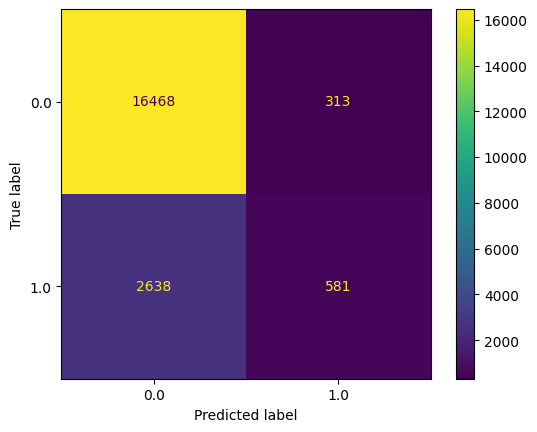

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
plt.show()

In [36]:
y_test.iloc[0:]

392201    0.0
361743    0.0
214239    0.0
574132    1.0
192647    0.0
         ... 
135813    0.0
551370    1.0
94677     0.0
620521    0.0
11235     0.0
Name: y, Length: 20000, dtype: float64

In [14]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='xgboost').plot()
plt.show()

ValueError: y should be a 1d array, got an array of shape (20000, 2) instead.